In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import os
from os.path import isfile, join

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
results_path = "..\\NativeApp\\results"
result_files = [join(results_path, i) for i in os.listdir(results_path) if isfile(join(results_path, i))]
result_files.sort()
usr_res_files = [list(i) for j, i in itertools.groupby(result_files, lambda a: (a.split('\\')[-1].split('_')[0]))]

In [4]:
def get_vals(files):
    pulsewidths, frequencies, amplitudes = [], [], []
    for file in files:
        with open(file) as f:
            content = np.array([i.split(',') for i in f.read().strip().split('\n')])
            pulsewidth, frequency, amplitude = content.T
            pulsewidths.append(list(map(int,pulsewidth)))
            frequencies.append(list(map(int,frequency)))
            amplitudes.append(list(map(int,amplitude)))
    return np.array(pulsewidths).flatten(), np.array(frequencies).flatten(), np.array(amplitudes).flatten()

In [5]:
all_pw, all_fq, all_amp = get_vals(result_files) #everything (all participants all widgets all combined in single list)

In [6]:
%matplotlib notebook
def plot(vals, ylabel):
    plt.scatter(range(len(vals)), vals)
    plt.xlabel("instance")
    plt.ylabel(ylabel)
    plt.show()
    
def plot3(pw, fq, amp, title):
    plt.figure(figsize=(13,4))
    plt.suptitle(title)
    plt.subplot(1, 3, 1)
    plt.scatter(range(len(pw)), pw)
    plt.xlabel("instance")
    plt.ylabel("Pulsewidth (microseconds)")
    plt.subplot(1, 3, 2)
    plt.scatter(range(len(fq)), fq)
    plt.xlabel("instance")
    plt.ylabel("Frequency (Pulses per second)")
    plt.subplot(1, 3, 3)
    plt.scatter(range(len(amp)), amp)
    plt.xlabel("instance")
    plt.ylabel("Amplitude (milliamps)")
    plt.show()

def plot3d(pw, fq, amp, title=""):
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,5))
    fig.suptitle(title)
    ax.scatter(pw,fq,amp)#, basefmt=" ")
    ax.set_xlabel("Pulsewidth (microseconds)")
    ax.set_ylabel("Frequency (Pulses per second)")
    ax.set_zlabel("Amplitude (milliamps)")
    ax.axes.set_xlim3d(left=0, right=200) 
    ax.axes.set_ylim3d(bottom=0, top=100) 
    ax.axes.set_zlim3d(bottom=0, top=20)
    plt.show()

Mean pulsewidth across every participant and every widget: 94.15833333333333 standard deviation: 35.12928404084294
Mean frequency across every participant and every widget: 52.43333333333333 standard deviation: 23.25035244655205
Mean amplitude across every participant and every widget: 10.908333333333333 standard deviation: 2.8664607484181994


<IPython.core.display.Javascript object>


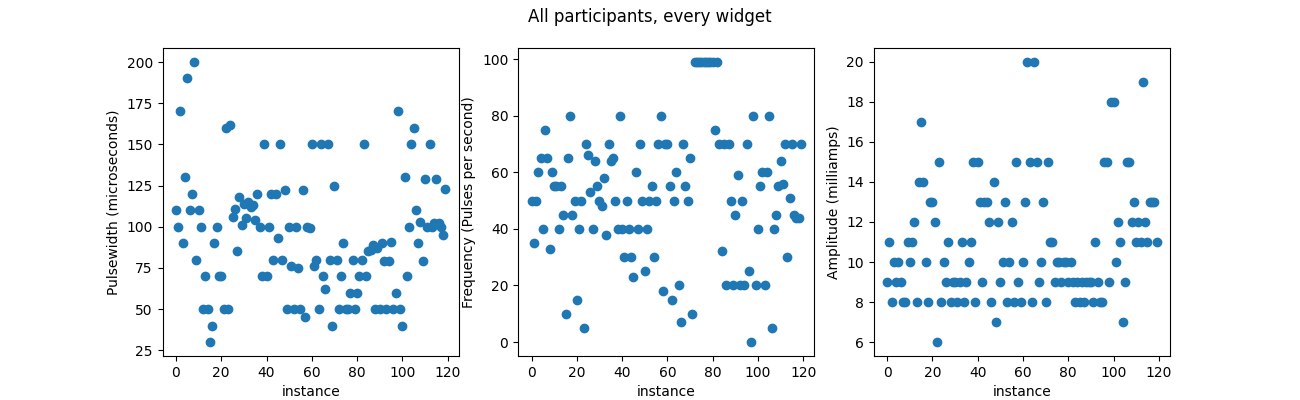

<IPython.core.display.Javascript object>


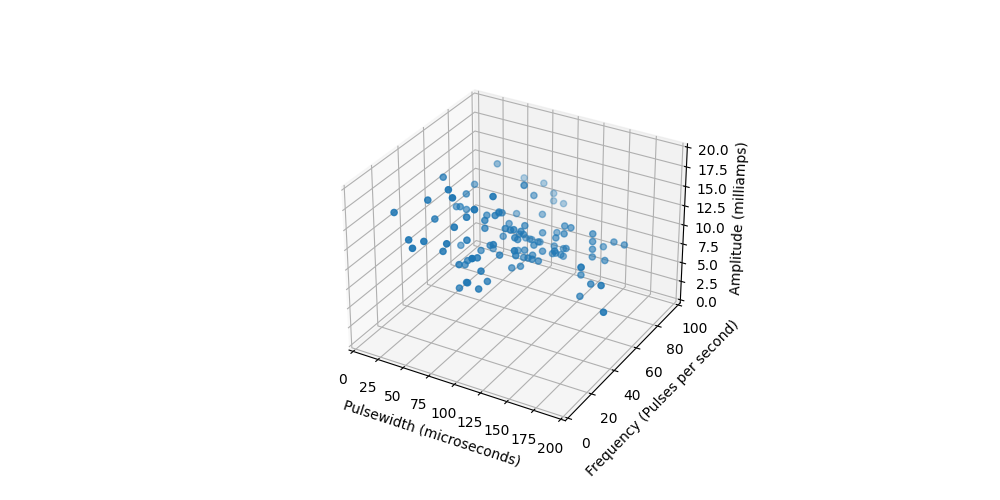

In [7]:
print(f"Mean pulsewidth across every participant and every widget: {np.mean(all_pw)} standard deviation: {np.std(all_pw)}")
print(f"Mean frequency across every participant and every widget: {np.mean(all_fq)} standard deviation: {np.std(all_fq)}")
print(f"Mean amplitude across every participant and every widget: {np.mean(all_amp)} standard deviation: {np.std(all_amp)}")
plot3(all_pw, all_fq, all_amp, "All participants, every widget")
plot3d(all_pw, all_fq, all_amp)

In [8]:
#all participants but grouped by widget
button_pw, button_fq, button_amp = get_vals(list(filter(lambda s: "button" in s, result_files)))
radio_pw, radio_fq, radio_amp = get_vals(list(filter(lambda s: "radio" in s, result_files)))
multi_pw, multi_fq, multi_amp = get_vals(list(filter(lambda s: "multi" in s, result_files)))
text_pw, text_fq, text_amp = get_vals(list(filter(lambda s: "text" in s, result_files)))

Mean pulsewidth for button widget: 94.63333333333334 standard deviation: 35.075616728560725
Mean frequency for button widget: 53.06666666666667 standard deviation: 23.703633101746707
Mean amplitude for button widget: 10.933333333333334 standard deviation: 2.780087928265739


<IPython.core.display.Javascript object>


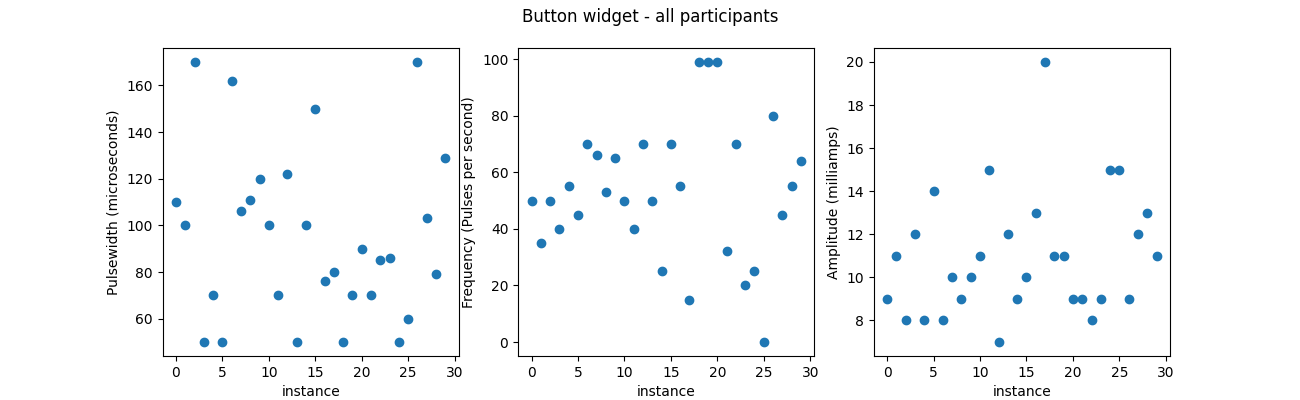

<IPython.core.display.Javascript object>


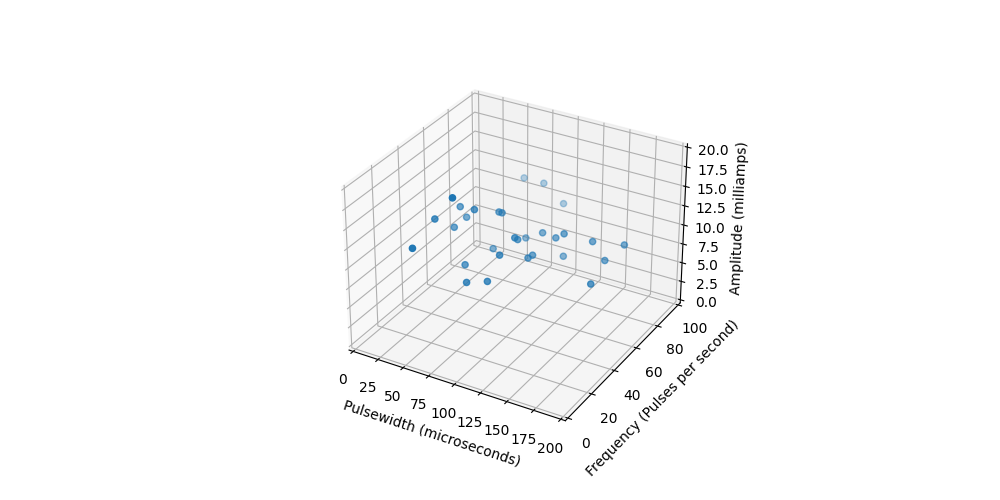

In [9]:
print(f"Mean pulsewidth for button widget: {np.mean(button_pw)} standard deviation: {np.std(button_pw)}")
print(f"Mean frequency for button widget: {np.mean(button_fq)} standard deviation: {np.std(button_fq)}")
print(f"Mean amplitude for button widget: {np.mean(button_amp)} standard deviation: {np.std(button_amp)}")
plot3(button_pw, button_fq, button_amp, "Button widget - all participants")
plot3d(button_pw, button_fq, button_amp)

Mean pulsewidth for radio widget: 97.5 standard deviation: 33.417310883233355
Mean frequency for radio widget: 52.266666666666666 standard deviation: 22.812179982534673
Mean amplitude for radio widget: 10.233333333333333 standard deviation: 2.027861489900684


<IPython.core.display.Javascript object>


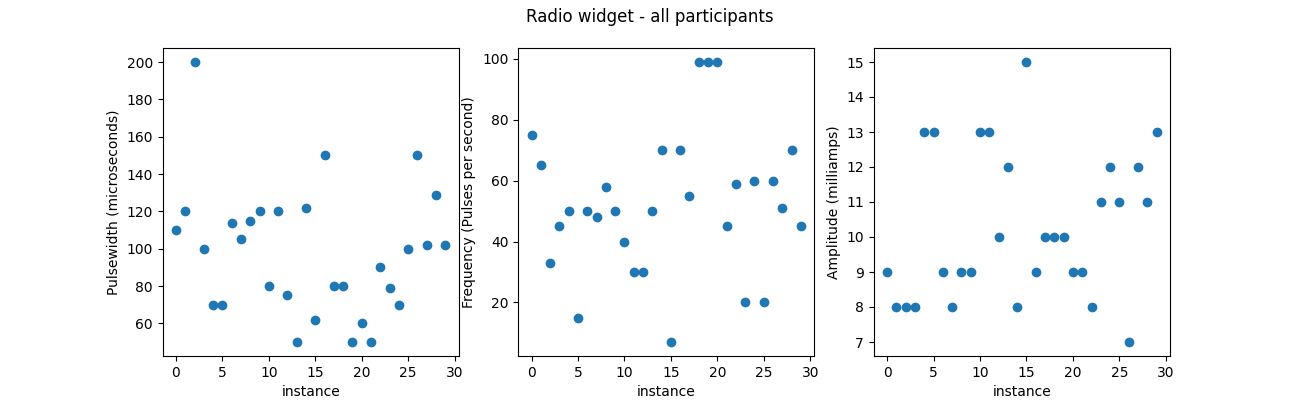

<IPython.core.display.Javascript object>


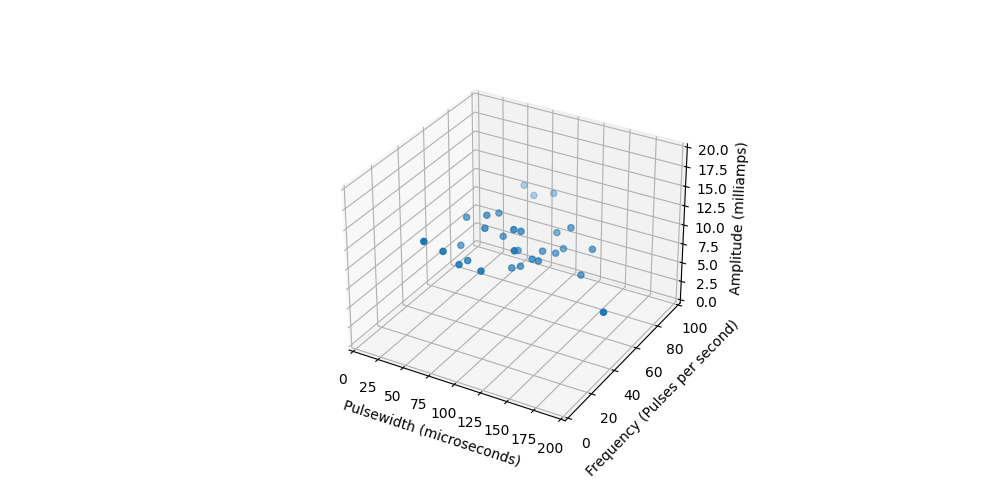

In [10]:
print(f"Mean pulsewidth for radio widget: {np.mean(radio_pw)} standard deviation: {np.std(radio_pw)}")
print(f"Mean frequency for radio widget: {np.mean(radio_fq)} standard deviation: {np.std(radio_fq)}")
print(f"Mean amplitude for radio widget: {np.mean(radio_amp)} standard deviation: {np.std(radio_amp)}")
plot3(radio_pw, radio_fq, radio_amp, "Radio widget - all participants")
plot3d(radio_pw, radio_fq, radio_amp)

Mean pulsewidth for multi-select widget: 88.2 standard deviation: 38.8753563756441
Mean frequency for multi-select widget: 53.733333333333334 standard deviation: 23.052018470310916
Mean amplitude for multi-select widget: 11.7 standard deviation: 3.5884072604244164


<IPython.core.display.Javascript object>


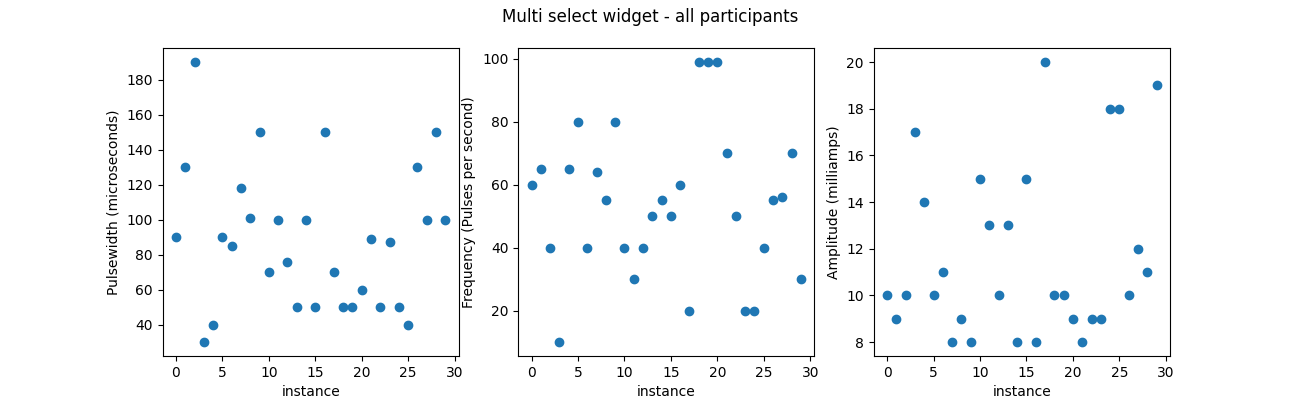

<IPython.core.display.Javascript object>


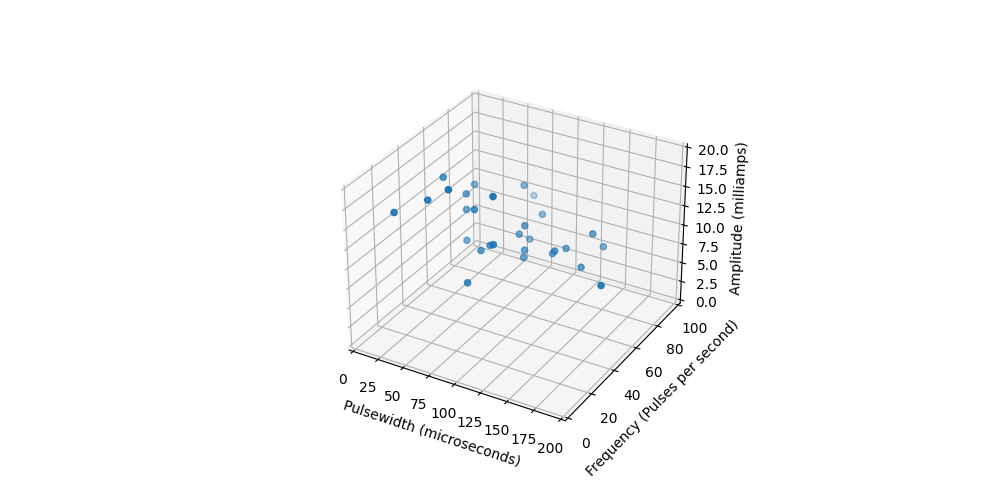

In [11]:
print(f"Mean pulsewidth for multi-select widget: {np.mean(multi_pw)} standard deviation: {np.std(multi_pw)}")
print(f"Mean frequency for multi-select widget: {np.mean(multi_fq)} standard deviation: {np.std(multi_fq)}")
print(f"Mean amplitude for multi-select widget: {np.mean(multi_amp)} standard deviation: {np.std(multi_amp)}")
plot3(multi_pw, multi_fq, multi_amp, "Multi select widget - all participants")
plot3d(multi_pw, multi_fq, multi_amp)

Mean pulsewidth for text widget: 96.3 standard deviation: 32.03867454603368
Mean frequency for text widget: 50.666666666666664 standard deviation: 23.311418279937886
Mean amplitude for text widget: 10.766666666666667 standard deviation: 2.6543465402157937


<IPython.core.display.Javascript object>


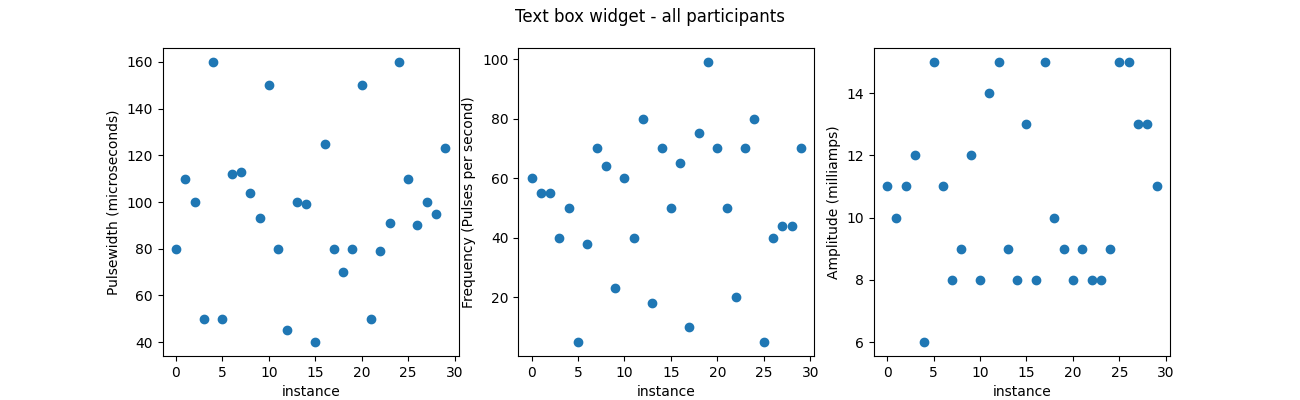

<IPython.core.display.Javascript object>


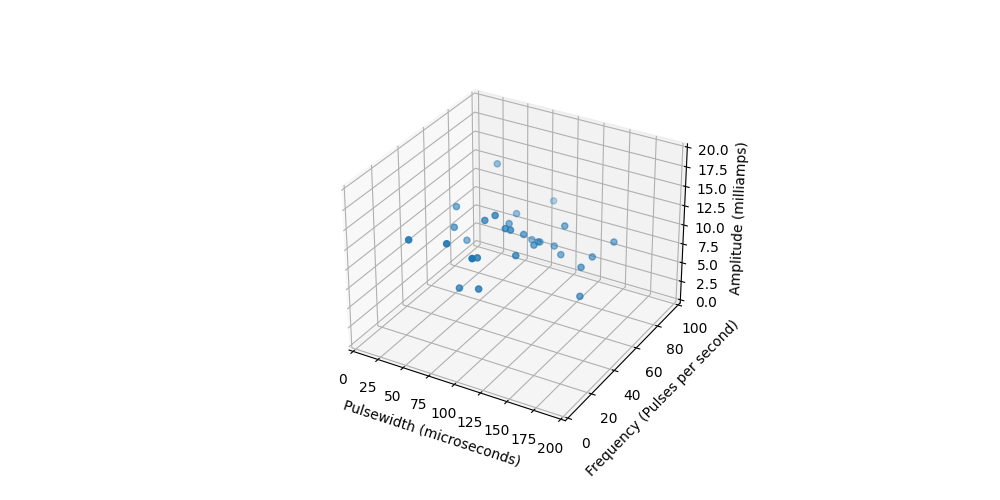

In [12]:
print(f"Mean pulsewidth for text widget: {np.mean(text_pw)} standard deviation: {np.std(text_pw)}")
print(f"Mean frequency for text widget: {np.mean(text_fq)} standard deviation: {np.std(text_fq)}")
print(f"Mean amplitude for text widget: {np.mean(text_amp)} standard deviation: {np.std(text_amp)}")
plot3(text_pw, text_fq, text_amp, "Text box widget - all participants")
plot3d(text_pw, text_fq, text_amp)

<IPython.core.display.Javascript object>


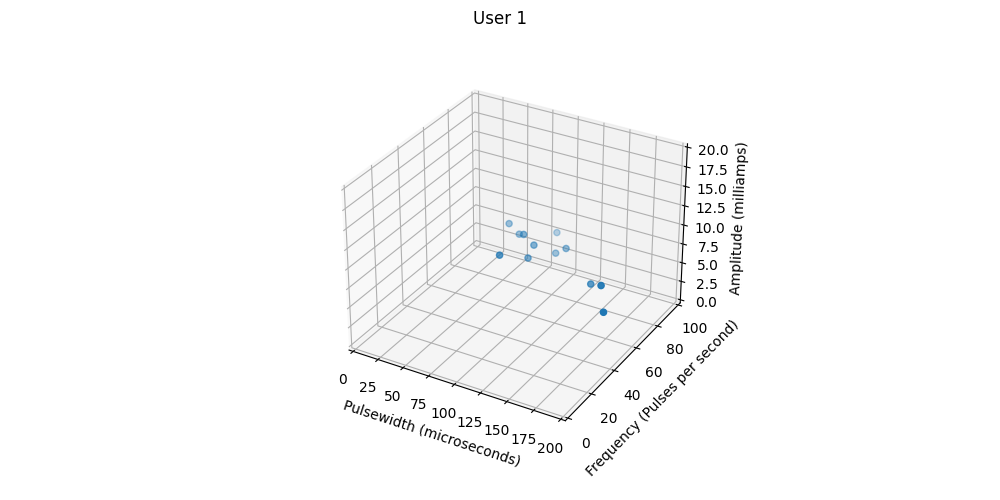

<IPython.core.display.Javascript object>


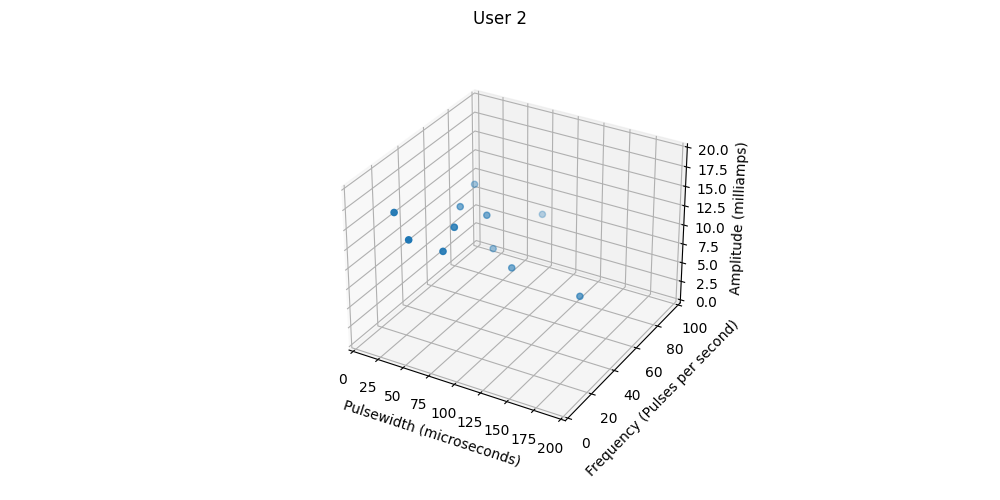

<IPython.core.display.Javascript object>


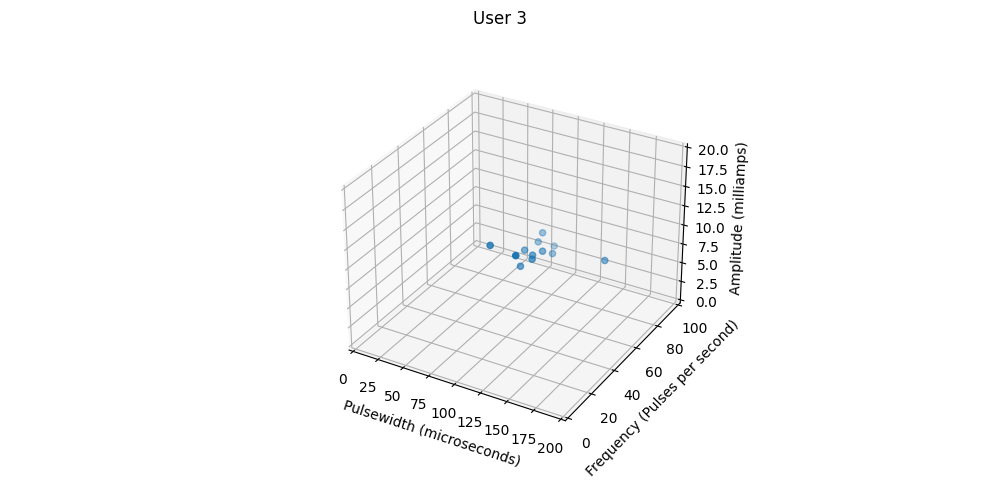

<IPython.core.display.Javascript object>


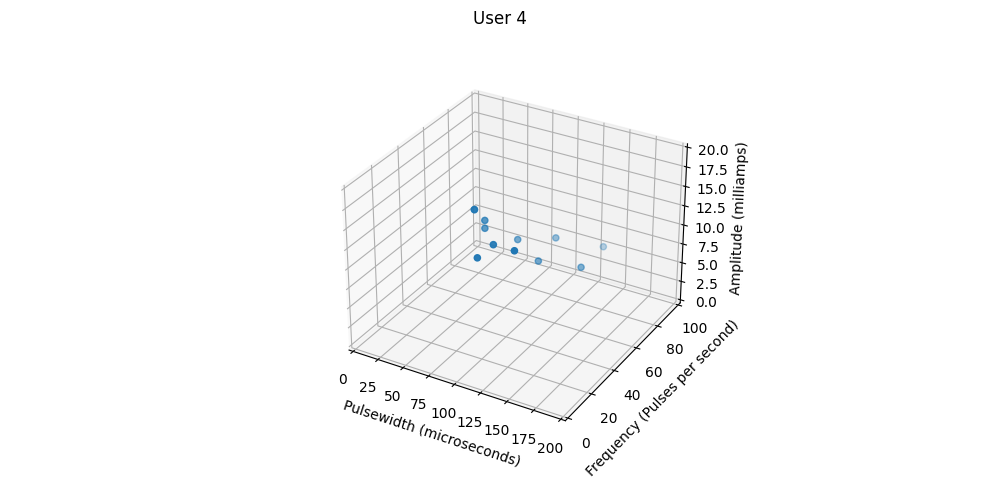

<IPython.core.display.Javascript object>


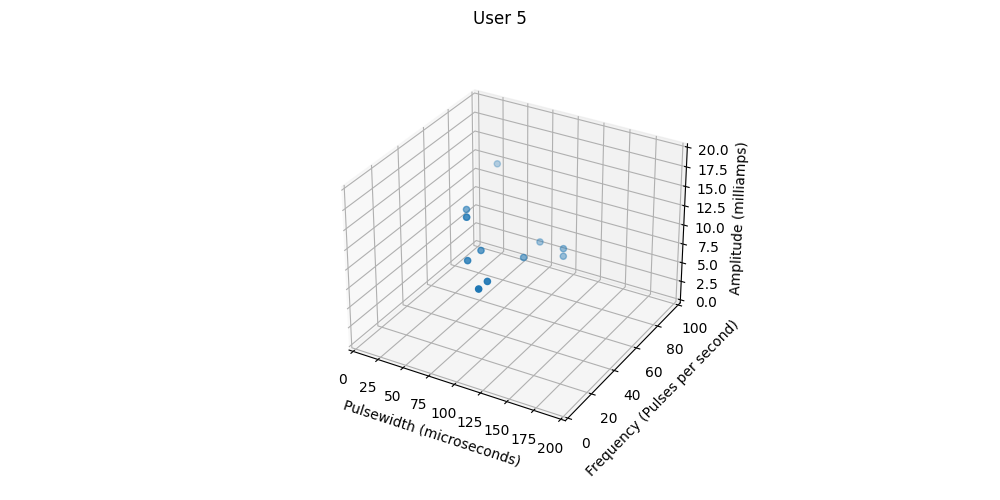

<IPython.core.display.Javascript object>


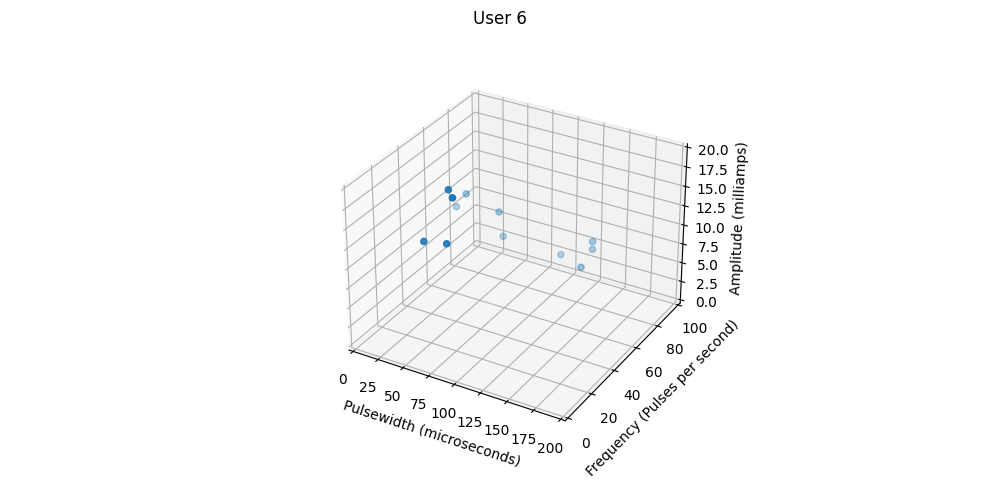

<IPython.core.display.Javascript object>


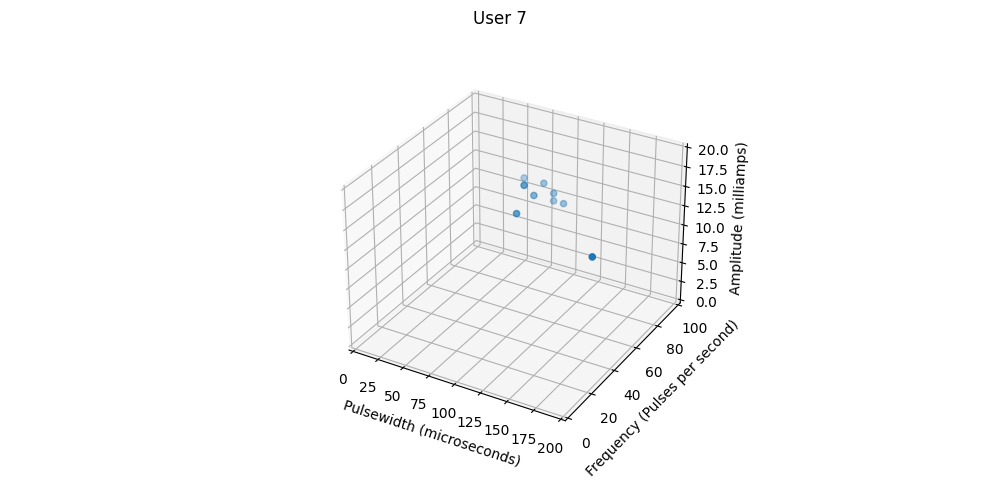

<IPython.core.display.Javascript object>


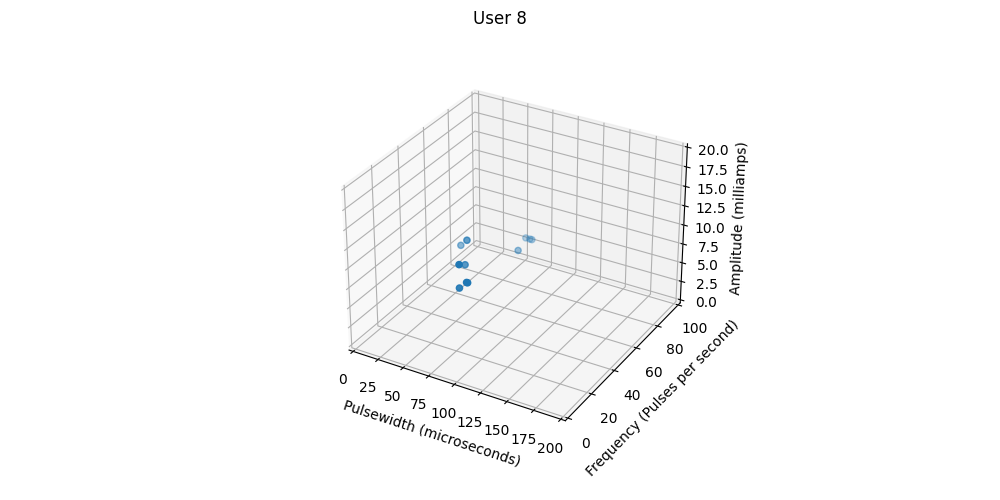

<IPython.core.display.Javascript object>


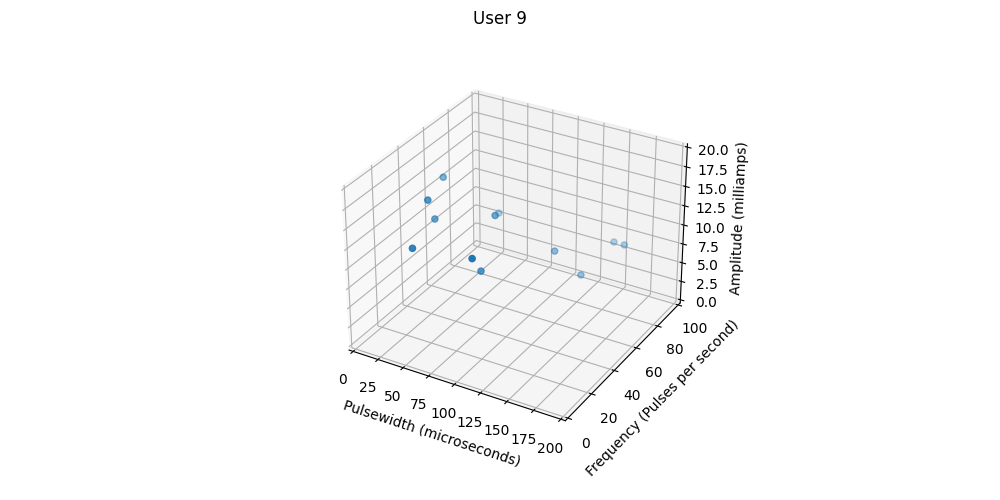

<IPython.core.display.Javascript object>


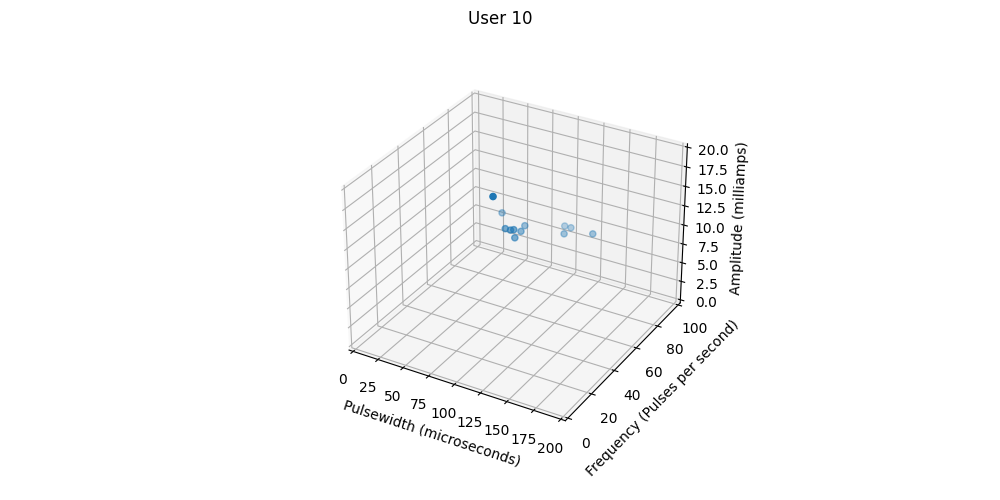

<ipython-input-6-9c9a0bd4e2c5>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,5))


<IPython.core.display.Javascript object>


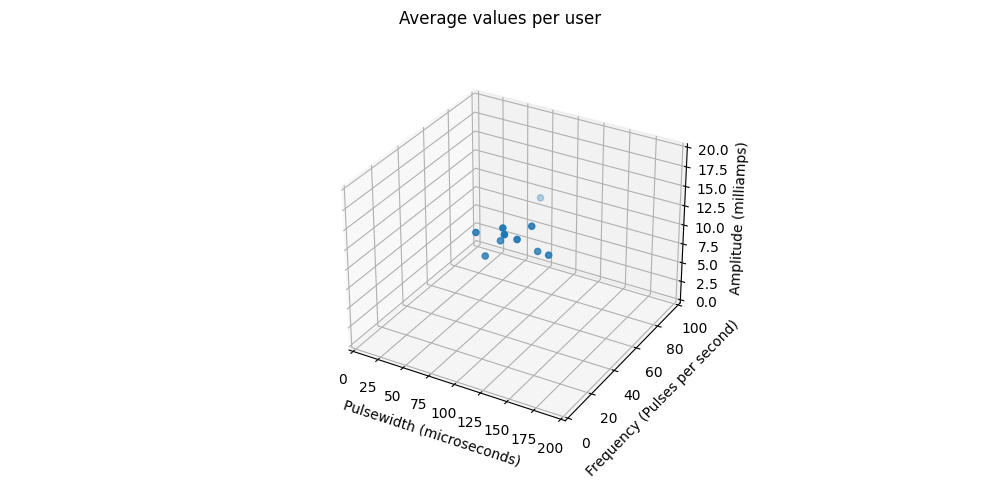

In [13]:
average_pw = []
average_fq = []
average_amp = []
for i, user in enumerate(usr_res_files):
    user_pw, user_fq, user_amp = get_vals(user)
    plot3d(user_pw, user_fq, user_amp, f"User {i+1}")
    average_pw.append(np.mean(user_pw))
    average_fq.append(np.mean(user_fq))
    average_amp.append(np.mean(user_amp))
    
plot3d(np.array(average_pw), np.array(average_fq), np.array(average_amp), "Average values per user")

<IPython.core.display.Javascript object>


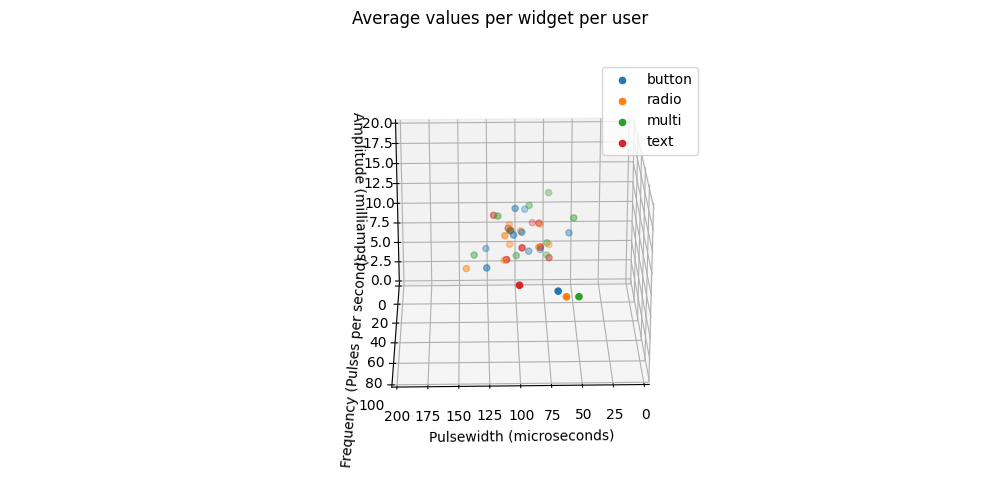

In [14]:
user_widget = {"button": [], "radio": [], "multi": [], "text": []}
for i, user in enumerate(usr_res_files):
    for file in user:
        widget = file.split('\\')[-1].split('_')[1].split('.')[0]
        user_widget_pw, user_widget_fq, user_widget_amp = get_vals([file])
        user_widget[widget].append((np.mean(user_widget_pw), np.mean(user_widget_fq), np.mean(user_widget_amp)))
        
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,5))
fig.suptitle("Average values per widget per user")
for widget, values in user_widget.items():
    v = np.array(values)
    pw = v[:,0]
    fq = v[:,1]
    amp = v[:,2]
    ax.scatter(pw,fq,amp, label=widget)

ax.set_xlabel("Pulsewidth (microseconds)")
ax.set_ylabel("Frequency (Pulses per second)")
ax.set_zlabel("Amplitude (milliamps)")
ax.axes.set_xlim3d(left=0, right=200) 
ax.axes.set_ylim3d(bottom=0, top=100) 
ax.axes.set_zlim3d(bottom=0, top=20)
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


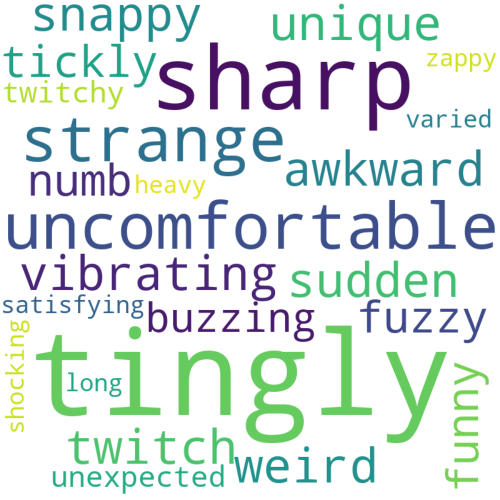

In [15]:
#Lets look at the questionaire
responses = []
with open("../Questionnaire/Electrotactile Feedback.csv") as f:
    responses = [i.replace('"','').split(',')[:11] for i in f.read().split('\n')] #dont include last two long form answers
    responses.pop(0)

responses = np.array(responses)
words = [i.split('-') for i in responses[:,10]]
all_words = []
stopwords = set(STOPWORDS)
for user_words in words:
    for word in user_words:
        all_words.append(word.strip().lower())

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(all_words)+" ")

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [16]:
mailing_list_users = [r[7] for r in responses if r[6] == "Yes"]
result_mail_users = [r[7] for r in responses if r[5] == "Yes"]
